### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('dark_background')

# Load Data

In [2]:
data = pd.read_csv('data/train_AV3.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
# Let's get the quick description of the data.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### Points to note:
1. There are 614 instances in the dataset
2. Multiple columns contains null values
3. Values are of different data types (object, int64 and float64)

In [4]:
# Lets look at our target value
data["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [5]:
# Let's look at the summary of the numerical attributes:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


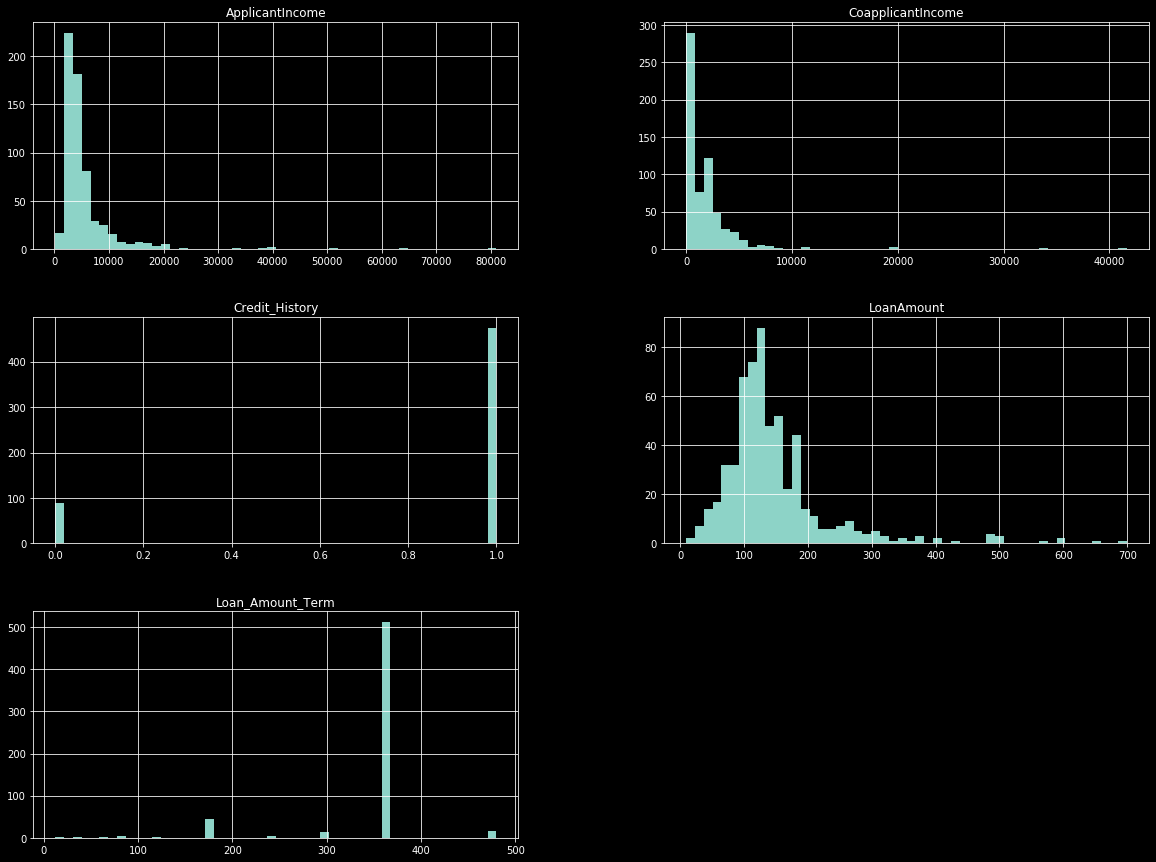

In [6]:
# Let's plot some visuals
data.hist(bins=50, figsize=(20, 15));

In [7]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Missing Values

In [8]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
# Loan_ID is not useful, so let's remove it.
data_drop = data.drop(columns=["Loan_ID"])

In [10]:
data_drop.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [11]:
data_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


## Split data into dependent and independent (labels) attributes

In [12]:
data_df = data_drop.drop("Loan_Status", axis=1)
labels = data_drop["Loan_Status"]

In [13]:
data_df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
dtype: int64

We can see that data_df contains missing many missing values.
Let's preprocess it:
 - fill missing values
 - Standarize numerical values

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

def preprocess(dataframe):
    num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler())
    ])

    cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="most_frequent"))
    ])
    
    num_attribs = [c for c in dataframe.columns if dataframe[c].dtype != 'O']
    cat_attribs = [c for c in dataframe.columns if c not in num_attribs]

    full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs)
    ])
    
    data_p = full_pipeline.fit_transform(dataframe)
    data_df = pd.DataFrame(data_p, columns=num_attribs+cat_attribs)
    
    return cat_attribs, data_df

In [15]:
# let's pass the data to the above function to preprocess it
cat_attribs, data_preprocessed = preprocess(data_df)

In [16]:
# Let's see the new preprocessed dataset
data_preprocessed.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,0.0729908,-0.554487,-0.211241,0.273231,0.411733,Male,No,0,Graduate,No,Urban
1,-0.134412,-0.0387315,-0.211241,0.273231,0.411733,Male,Yes,1,Graduate,No,Rural
2,-0.393747,-0.554487,-0.948996,0.273231,0.411733,Male,Yes,0,Graduate,Yes,Urban
3,-0.462062,0.25198,-0.306435,0.273231,0.411733,Male,Yes,0,Not Graduate,No,Urban
4,0.0977284,-0.554487,-0.0565506,0.273231,0.411733,Male,No,0,Graduate,No,Urban


In [17]:
# Let's check missing values in new dataset
data_preprocessed.isna().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
Property_Area        0
dtype: int64

In [18]:
data_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ApplicantIncome    614 non-null    object
 1   CoapplicantIncome  614 non-null    object
 2   LoanAmount         614 non-null    object
 3   Loan_Amount_Term   614 non-null    object
 4   Credit_History     614 non-null    object
 5   Gender             614 non-null    object
 6   Married            614 non-null    object
 7   Dependents         614 non-null    object
 8   Education          614 non-null    object
 9   Self_Employed      614 non-null    object
 10  Property_Area      614 non-null    object
dtypes: object(11)
memory usage: 52.9+ KB


In [19]:
## Save this preprocessed data for future use
data_preprocessed.to_csv("data/data_preprocessed.csv")

In [20]:
# Let's view our target value
labels

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

It's still categorical data, so let's fix it too.

In [21]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

In [22]:
# Let's look at the labels again
labels

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

So, now it's as expected

## Categorical Encoding

Let's encode our categorical attributes.

In [23]:
# set drop_first=True to avoid dummy variable trap or multicollinearity
data_prepared = pd.get_dummies(
    data_preprocessed, columns=cat_attribs, prefix=cat_attribs, drop_first=True)

In [24]:
cat_attribs

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [41]:
data_prepared = data_prepared.astype(np.int64)

In [42]:
data_prepared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   ApplicantIncome          614 non-null    int64
 1   CoapplicantIncome        614 non-null    int64
 2   LoanAmount               614 non-null    int64
 3   Loan_Amount_Term         614 non-null    int64
 4   Credit_History           614 non-null    int64
 5   Gender_Male              614 non-null    int64
 6   Married_Yes              614 non-null    int64
 7   Dependents_1             614 non-null    int64
 8   Dependents_2             614 non-null    int64
 9   Dependents_3+            614 non-null    int64
 10  Education_Not Graduate   614 non-null    int64
 11  Self_Employed_Yes        614 non-null    int64
 12  Property_Area_Semiurban  614 non-null    int64
 13  Property_Area_Urban      614 non-null    int64
dtypes: int64(14)
memory usage: 67.3 KB


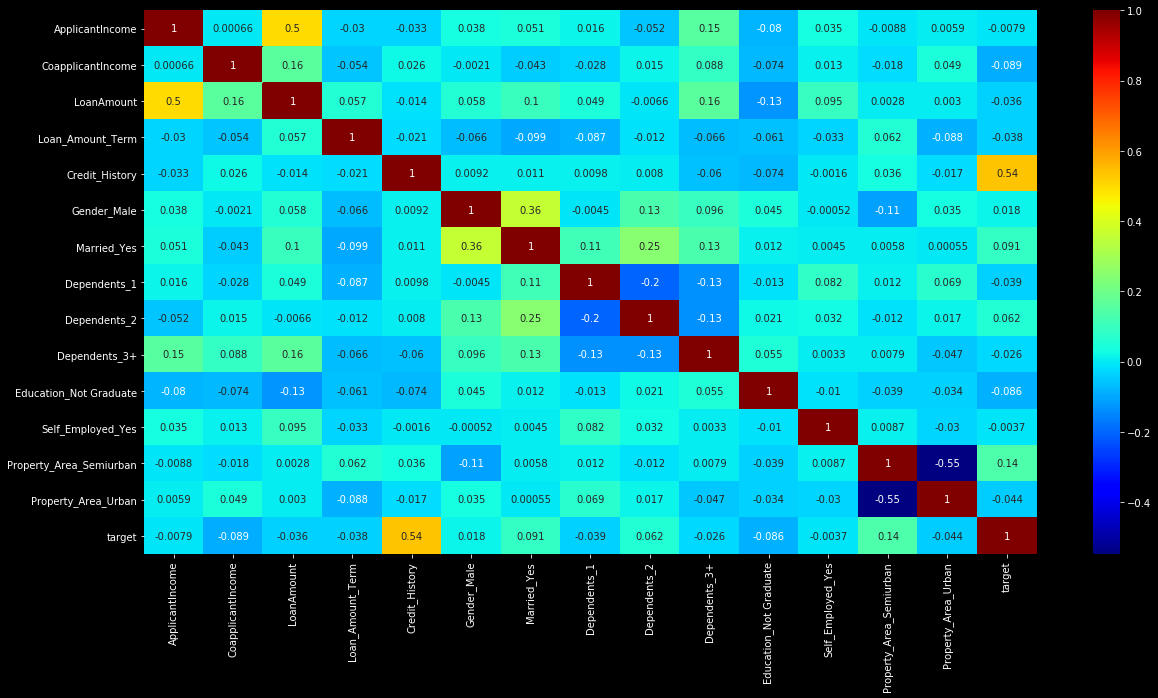

In [54]:
# Now let's look at the correlation matrix again
import seaborn as sns
data_all = data_prepared.copy()
data_all["target"] = labels
corr_mat = data_all.corr()
fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.heatmap(corr_mat, annot=True, fmt=".2g", cmap='jet')
plt.show()

In [28]:
# Spliting Dataset into Train and Test

from sklearn.model_selection import train_test_split

X = data_prepared
y = labels

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

X_train.shape, y_train.shape, X_test.shape, y_train.shape

((491, 14), (491,), (123, 14), (491,))

# Train and Evaluate the model

In [29]:
# Display Score
def scores(model):
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    print(f"Train Score {train_score:.2f}")
    print(f"Test Score {test_score:.2f}")

### Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver="liblinear")

log_reg.fit(X_train, y_train)

scores(log_reg)

Train Score 0.82
Test Score 0.79


### K Nearest Neighbors

In [31]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)
scores(knn)

Train Score 0.82
Test Score 0.80


### Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=3)
tree_clf.fit(X_train, y_train)
scores(tree_clf)

Train Score 0.82
Test Score 0.79


### Support Vector Machine

In [33]:
from sklearn.svm import SVC

svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train, y_train)
scores(svm_clf)

Train Score 0.81
Test Score 0.79


## Train and Visualize accuracies with default hyperparameters

In [34]:
models = {"LogisticRegression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "DecisionTree": DecisionTreeClassifier(),
          "SVC": SVC()}

train_scores = {}
test_scores = {}

for label, model in models.items():
    model.fit(X_train, y_train)
    train_scores[label] = model.score(X_train, y_train)
    test_scores[label] = model.score(X_test, y_test)

In [35]:
train_scores

{'LogisticRegression': 0.8187372708757638,
 'KNN': 0.845213849287169,
 'DecisionTree': 1.0,
 'SVC': 0.8329938900203666}

In [36]:
test_scores

{'LogisticRegression': 0.7886178861788617,
 'KNN': 0.7479674796747967,
 'DecisionTree': 0.6991869918699187,
 'SVC': 0.7723577235772358}

In [37]:
train_sc_df = pd.DataFrame(train_scores.values(), columns=["Accuracy"],
                           index=train_scores.keys())
train_sc_df

,Accuracy
LogisticRegression,0.818737
KNN,0.845214
DecisionTree,1.000000
SVC,0.832994


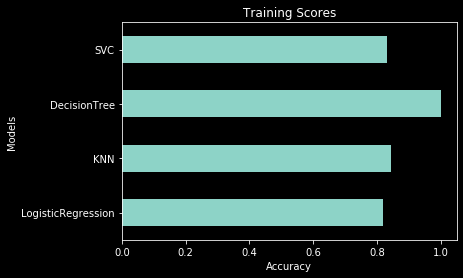

In [38]:
train_sc_df.plot(kind="barh", legend=False, )
plt.title("Training Scores")
plt.xlabel("Accuracy")
plt.ylabel("Models")
plt.show()

In [39]:
test_sc_df = pd.DataFrame(test_scores.values(), 
                          index=test_scores.keys(), columns=["Accuracy"])
test_sc_df

,Accuracy
LogisticRegression,0.788618
KNN,0.747967
DecisionTree,0.699187
SVC,0.772358


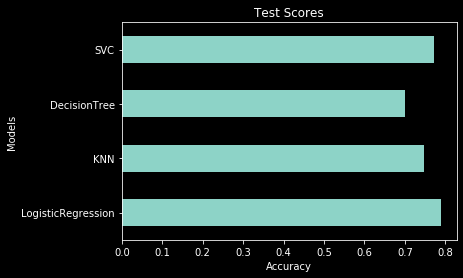

In [40]:
test_sc_df.plot(kind="barh", legend=False)
plt.title("Test Scores")
plt.xlabel("Accuracy")
plt.ylabel("Models")
plt.show()

## Conclusion:
1. We can easily see that the decision tree is overfitting.
2. Logistic Regression has the highest accuracy on a test set.
3. Support Vector Machine and KNN are also working fine